In [1]:
import numpy as np
from PIL import Image
from ImageFrame import Frame
from EdgeFinderV4 import BoundaryDetector as BD2
import timeit
import cv2 as cv
from numba import njit
import matplotlib.pyplot as plt

In [ ]:
0-5*int(0/5)

load CVS file successfully
1253.0-640=613.0
1225.0-640=585.0
1192.0-640=552.0


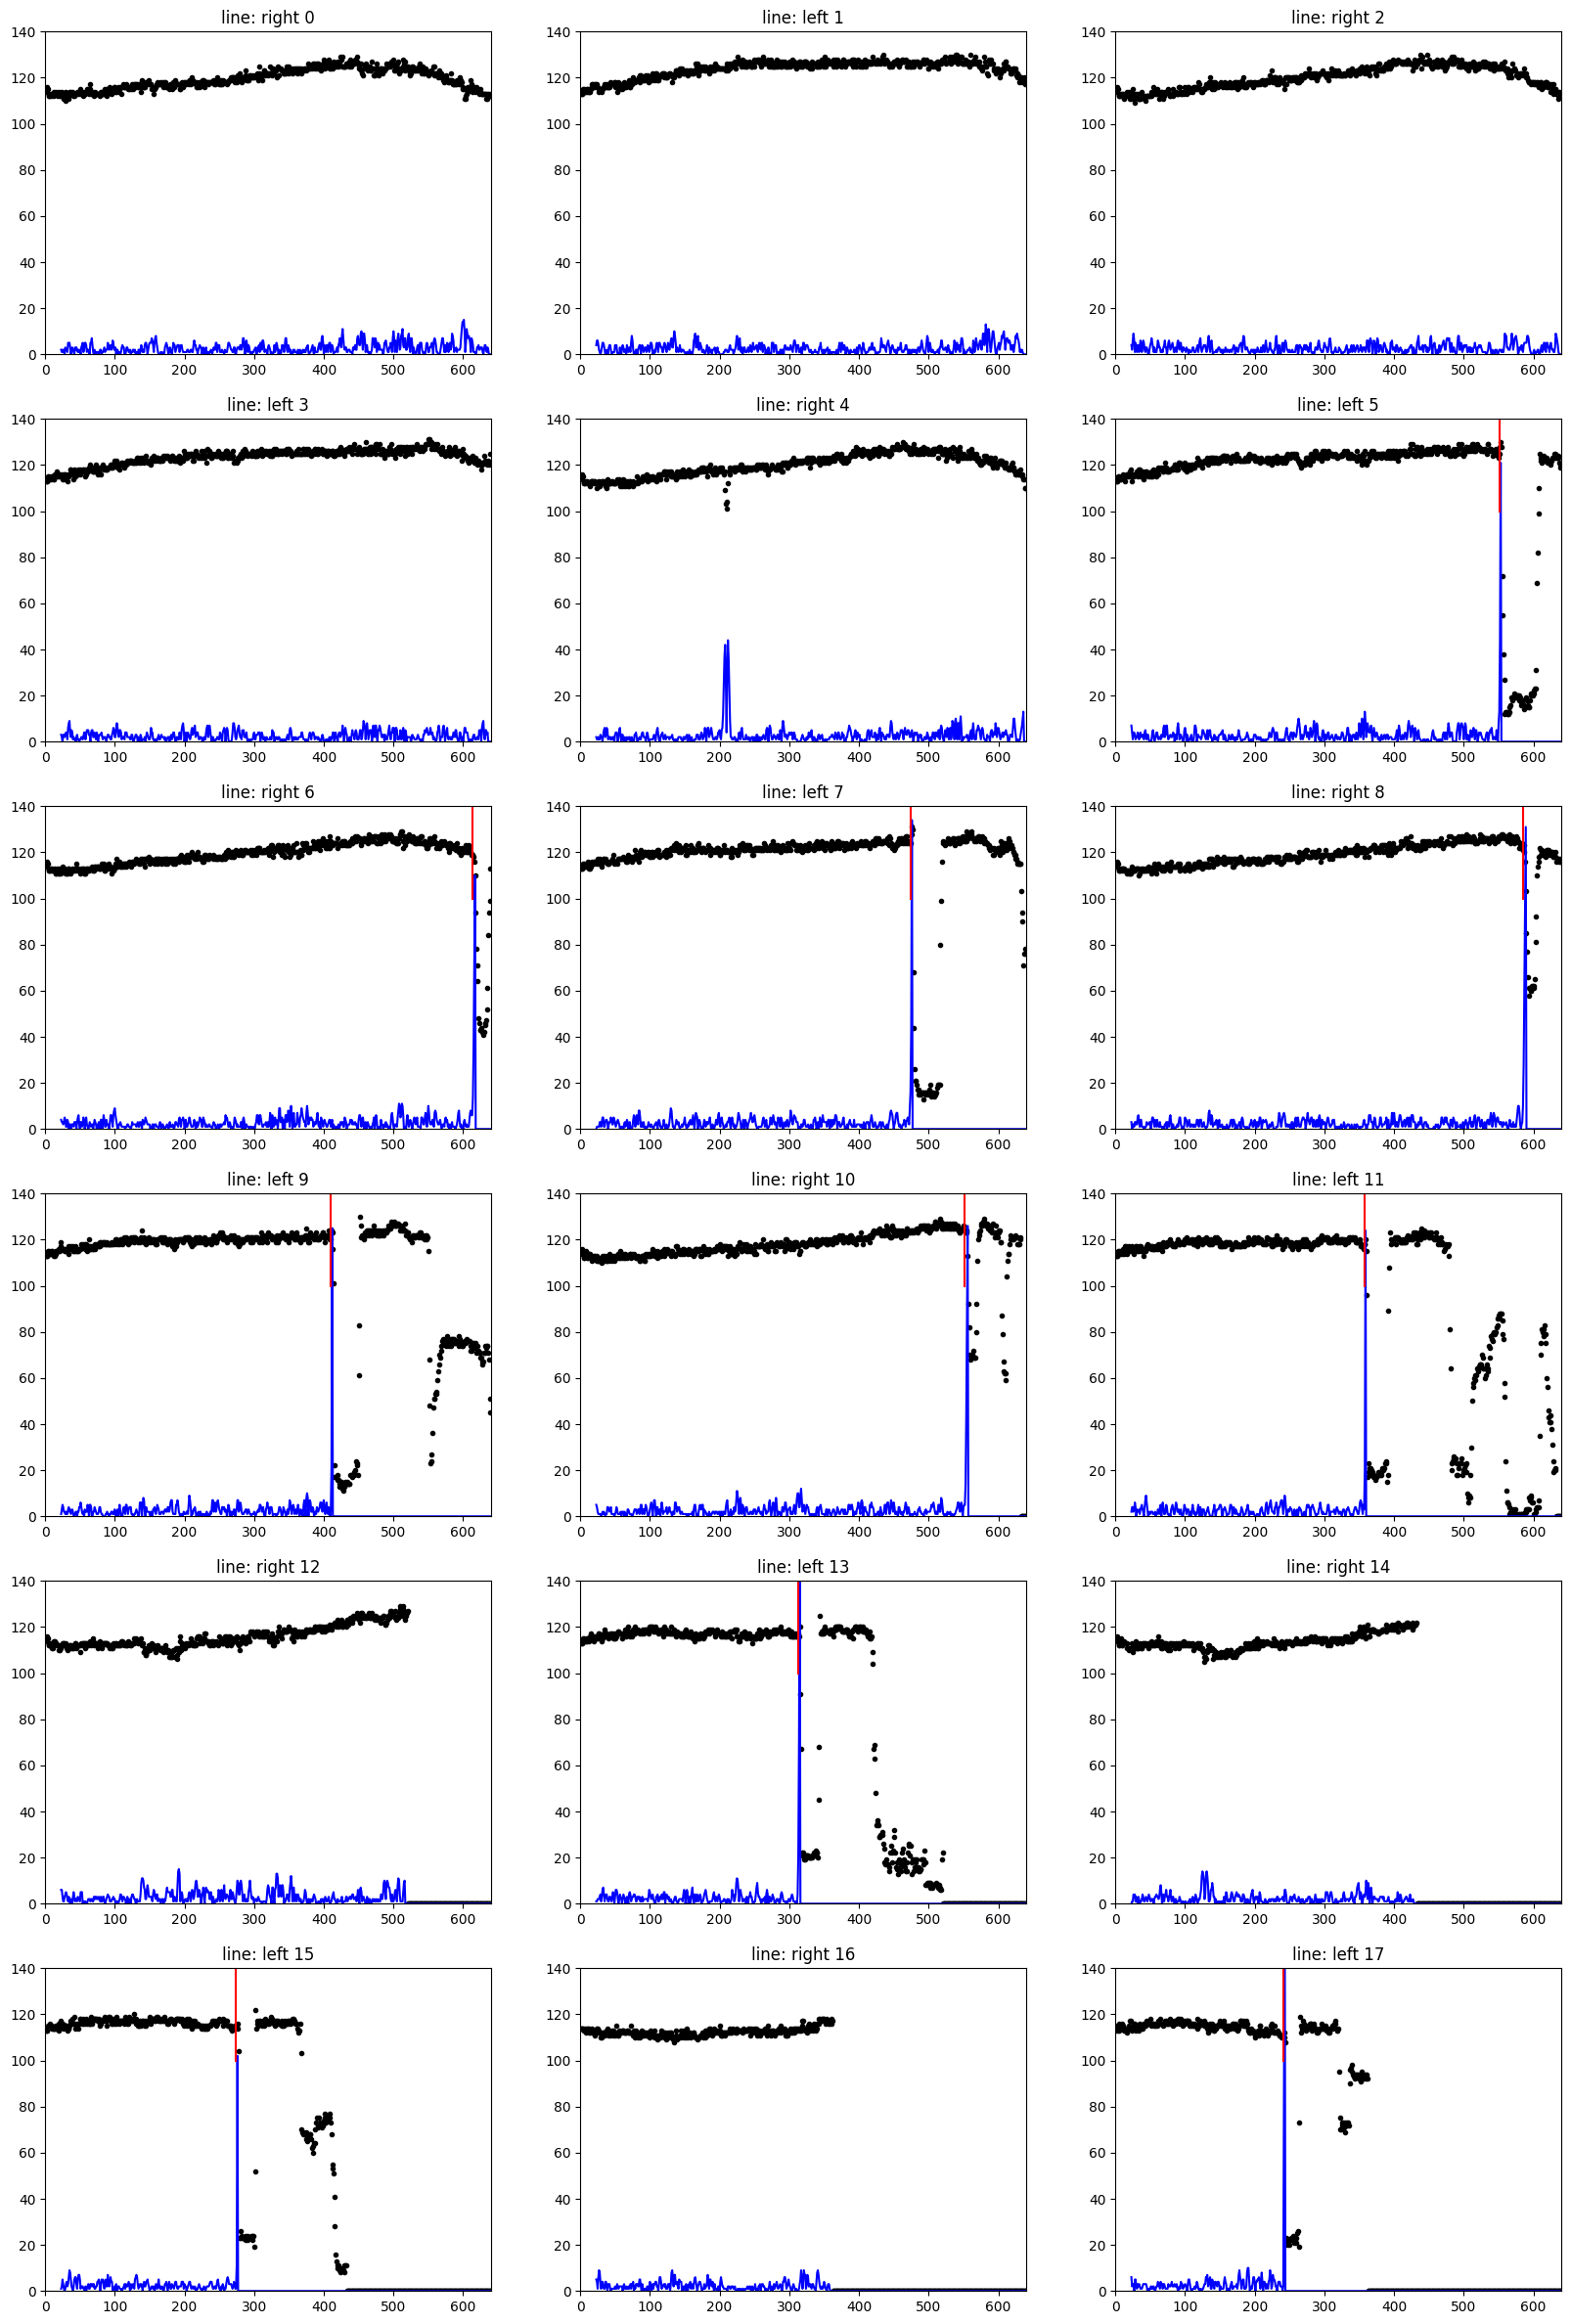

In [2]:
img = np.array(Image.open("TestingImage/Image75.jpg"))
frame1 = Frame(1280,720,5)

kernal = np.array([-1,-1,-1,0,1,1,1])
steps = 0
T_hold = 100
bP = BD2(img,kernal,frame1,steps,T_hold)
data = np.empty([int(frame1.width/2.0),0],int)
for key in frame1.fline.keys():
    data = np.append(data,np.array([[img[int(y),int(x),0]] for x,y in frame1.fline[key]]),axis=1)
fig,axs=plt.subplots(6,3,figsize=(20,30))

for i,j in enumerate(bP.boundary[:,0]):
    if i%2:
        axs[int(i/3),i-3*int(i/3)].set_title(f'line: left {i}')
    else:
        axs[int(i/3),i-3*int(i/3)].set_title(f'line: right {i}')
    axs[int(i/3),i-3*int(i/3)].axis((0,640,0,140))
    axs[int(i/3),i-3*int(i/3)].plot(range(0,data.shape[0]),data[:,i],'k.')
    
    axs[int(i/3),i-3*int(i/3)].plot(range(int((len(kernal))/2)+20,bP.conv_resutl.shape[1]+int((len(kernal))/2)+20),bP.conv_resutl[i,:],'b-')
    
    if not j:
        continue
    if not i%2:
        axs[int(i/3),i-3*int(i/3)].plot([j-data.shape[0],j-data.shape[0]],[100,160],'r-')
        print(f'{j}-{data.shape[0]}={j-data.shape[0]}')
    else:
        axs[int(i/3),i-3*int(i/3)].plot([data.shape[0]-j,data.shape[0]-j],[100,160],'r-')
plt.show()

In [ ]:
img = np.array(Image.open("TestingImage/Image18.jpg"))
frame1 = Frame(1280,720,10)

kernal = np.array([-1,-1,0,1,1])
steps = 0
T_hold = 75
bP = BD2(img,kernal,frame1,steps,T_hold)
data = np.empty([int(frame1.width/2.0),0],int)
img[]
for key in frame1.fline.keys():
    data = np.append(data,np.array([[img[int(y),int(x),0]] for x,y in frame1.fline[key]]),axis=1)
fig,axs=plt.subplots(3,2,figsize=(22,15))

def plotMe(i,n,line,bP,kernal,title,mode=0):
    j=bP.boundary[0,0]
    axs[i,n].set_title(f'{title}')
    if mode:
        axs[i,n].axis((0,640,0,1400))
    else:
        axs[i,n].axis((0,640,0,240))

    axs[i,n].plot(range(0,data.shape[0]),data[:,line],'k.')

    axs[i,n].plot(range(int((len(kernal))/2)+20-3,bP.conv_resutl.shape[1]+int((len(kernal))/2)+20-3),bP.conv_resutl[line,:],'b-')

        
    #if not i%2:
    #    axs[i,n].plot([j-data.shape[0],j-data.shape[0]],[100,160],'r-')
        #print(f'{j}-{data.shape[0]}={j-data.shape[0]}')
    #else:
    #    axs[i,n].plot([data.shape[0]-j,data.shape[0]-j],[100,160],'r-')
kernel = np.array([-1,0,1])
bP = BD2(img,kernel,frame1,steps,500)
print(bP.conv_resutl)
plotMe(0,0,3,BD2(img,kernel,frame1,steps,500),kernel,'Kernel [-1,0,1]')
kernel = np.array([-1,-1,0,1,1])
plotMe(1,0,3,BD2(img,kernel,frame1,steps,500),kernel,'Kernel [-1,-1,0,1,1]')
kernel = np.array([-1,-1,-1,0,1,1,1])
plotMe(2,0,3,BD2(img,kernel,frame1,steps,500),kernel,'Kernel [-1,-1,-1,0,1,1,1]')

kernel = np.array([-2,0,2])
plotMe(0,1,3,BD2(img,kernel,frame1,steps,500),kernel,'Kernel [-2,0,2]')
kernel = np.array([-1,-2,0,2,1])
plotMe(1,1,3,BD2(img,kernel,frame1,steps,500),kernel,'Kernel [-1,-2,0,2,1]')
kernel = np.array([-1,-3,-8,0,8,3,1])
plotMe(2,1,3,BD2(img,kernel,frame1,steps,10000),kernel,'Kernel [-1,-3,-8,0,8,3,1]',mode=1)

plt.show()


In [ ]:
img[int(frame1.fline['4'][100][1]),100,0]

d = frame1.fline['4']

print(d[-100][1])
img[int(d[-100][1]),99,0]


In [ ]:
img = np.array(Image.open("TestingImage/Image18.jpg"))
frame1 = Frame(1280,720,10)

kernal = np.array([-1,-1,0,1,1])
steps = 0
T_hold = 75
bP = BD2(img,kernal,frame1,steps,T_hold)
data = np.empty([int(frame1.width/2.0),0],int)
img[int(d[-500][1]),499,0]=200

for key in frame1.fline.keys():
    data = np.append(data,np.array([[img[int(y),int(x),0]] for x,y in frame1.fline[key]]),axis=1)
fig,axs=plt.subplots(2,2,figsize=(22,10))

def plotMe(i,n,line,bP,kernal,title,mode=0):
    j=bP.boundary[0,0]
    axs[i,n].set_title(f'{title}')
    #adding noise 
    #data[50,line]=50
    if mode:
        axs[i,n].axis((0,640,0,1400))
    else:
        axs[i,n].axis((0,640,0,300))

    axs[i,n].plot(range(0,data.shape[0]),data[:,line],'k.')

    axs[i,n].plot(range(int((len(kernal))/2)+20-3,bP.conv_resutl.shape[1]+int((len(kernal))/2)+20-3),bP.conv_resutl[line,:],'b-')

        
    #if not i%2:
    #    axs[i,n].plot([j-data.shape[0],j-data.shape[0]],[100,160],'r-')
        #print(f'{j}-{data.shape[0]}={j-data.shape[0]}')
    #else:
    #    axs[i,n].plot([data.shape[0]-j,data.shape[0]-j],[100,160],'r-')
kernel = np.array([-1,0,1])
bP = BD2(img,kernel,frame1,steps,500)
plotMe(0,0,3,BD2(img,kernel,frame1,steps,500),kernel,'Kernel [-1,0,1]')
kernel = np.array([-1,-1,0,1,1])
plotMe(0,1,3,BD2(img,kernel,frame1,steps,500),kernel,'Kernel [-1,-1,0,1,1]')
kernel = np.array([-1,-1,-1,0,1,1,1])
plotMe(1,0,3,BD2(img,kernel,frame1,steps,500),kernel,'Kernel [-1,-1,-1,0,1,1,1]')

kernel = np.array([-1,-2,0,2,1])
plotMe(1,1,3,BD2(img,kernel,frame1,steps,500),kernel,'Kernel [-1,-2,0,2,1]')

plt.show()


In [ ]:
dB = BD2(img,kernel,frame1,steps,500)
plt.plot(range(len(dB.conv_resutl[3,:])),dB.conv_resutl[3,:],'r-')


In [ ]:
kernel = np.array([-1,0,1])
dB = BD2(img,kernel,frame1,steps,1000)
int = np.argpartition(dB.conv_resutl[3,300:400], -4)[-2:]
n1 = dB.conv_resutl[3,int+300]
print(f'Noise Top2 {dB.conv_resutl[3,int+300]}')
int = np.argpartition(dB.conv_resutl[3,500:600], -4)[-2:]
r1 = dB.conv_resutl[3,int+500]
print(f'Road Top2 {dB.conv_resutl[3,int+500]}')
plt.plot(range(len(dB.conv_resutl[3,:])),dB.conv_resutl[3,:],'r-')
plt.show()

kernel = np.array([-1,-1,0,1,1])
dB = BD2(img,kernel,frame1,steps,1000)
int = np.argpartition(dB.conv_resutl[3,300:400], -4)[-2:]
n2 = dB.conv_resutl[3,int+300]

print(f'Noise Top2 {dB.conv_resutl[3,int+300]}')
int = np.argpartition(dB.conv_resutl[3,500:600], -4)[-2:]
r2 = dB.conv_resutl[3,int+500]

print(f'Road Top2 {dB.conv_resutl[3,int+500]}')
plt.plot(range(len(dB.conv_resutl[3,:])),dB.conv_resutl[3,:],'r-')
plt.show()

kernel = np.array([-1,-1,-1,0,1,1,1])
dB = BD2(img,kernel,frame1,steps,1000)
int = np.argpartition(dB.conv_resutl[3,300:400], -4)[-2:]
n3 = dB.conv_resutl[3,int+300]

print(f'Noise Top2 {dB.conv_resutl[3,int+300]}')
int = np.argpartition(dB.conv_resutl[3,500:600], -4)[-2:]
r3 = dB.conv_resutl[3,int+500]

print(f'Road Top2 {dB.conv_resutl[3,int+500]}')
plt.plot(range(len(dB.conv_resutl[3,:])),dB.conv_resutl[3,:],'r-')
plt.show()

print(f'd1 {n2-n1} {r2-r1}')

print(f'd1 {n3-n1} {r3-r1}')



In [ ]:
np.argsort(dB.conv_resutl[3,300:400])

In [ ]:
img = np.array(Image.open("TestingImage/Image1.jpg"))
frame1 = Frame(1280,720,10)

kernal = np.array([-1,-1,0,1,1])
steps = 0
T_hold = 75
bP = BD2(img,kernal,frame1,steps,T_hold)
data = np.empty([int(frame1.width/2.0),0],int)
for key in frame1.fline.keys():
    data = np.append(data,np.array([[img[int(y),int(x),0]] for x,y in frame1.fline[key]]),axis=1)
fig,axs=plt.subplots(2,4,figsize=(20,9))

for i,j in enumerate(bP.boundary[:,0]):
    if i%2:
        axs[int(i/4),i-4*int(i/4)].set_title(f'line: left {i}')
    else:
        axs[int(i/4),i-4*int(i/4)].set_title(f'line: right {i}')
    axs[int(i/4),i-4*int(i/4)].axis((0,640,0,140))
    axs[int(i/4),i-4*int(i/4)].plot(range(0,data.shape[0]),data[:,i],'k.')
    
    axs[int(i/4),i-4*int(i/4)].plot(range(int((len(kernal))/2)+20,bP.conv_resutl.shape[1]+int((len(kernal))/2)+20),bP.conv_resutl[i,:],'b-')
    
    if not j:
        continue
    if not i%2:
        axs[int(i/4),i-4*int(i/4)].plot([j-data.shape[0],j-data.shape[0]],[100,160],'r-')
        print(f'{j}-{data.shape[0]}={j-data.shape[0]}')
    else:
        axs[int(i/4),i-4*int(i/4)].plot([data.shape[0]-j,data.shape[0]-j],[100,160],'r-')
plt.show()

In [ ]:
ddepth = cv.CV_16S
img1 = cv.imread("TestingImage/Image"+str(1)+".jpg")
img3 = cv.GaussianBlur(img1,(3,3),0)
img2 = cv.cvtColor(img3,cv.COLOR_BGR2GRAY)
img4 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
grad_x = cv.Sobel(img2, ddepth, 1, 0, ksize=3, scale=1, delta=0, borderType=cv.BORDER_DEFAULT)
grad_x2 = cv.Sobel(img2, ddepth, 1, 0, ksize=3, scale=1, delta=0, borderType=cv.BORDER_DEFAULT)

grad_y = cv.Sobel(img2, ddepth, 0, 1, ksize=3, scale=1, delta=0, borderType=cv.BORDER_DEFAULT)
grad_y2 = cv.Sobel(img2, ddepth, 0, 1, ksize=3, scale=1, delta=0, borderType=cv.BORDER_DEFAULT)

abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)
abs_grad_x2 = cv.convertScaleAbs(grad_x2)
abs_grad_y2 = cv.convertScaleAbs(grad_y2)

    
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
grad2 = cv.addWeighted(abs_grad_x2, 0.5, abs_grad_y2, 0.5, 0)
c=cv.Canny(img2,100,200)

fig,axs=plt.subplots(2,2,figsize=(15,9))


axs[0,0].imshow(img1)
axs[0,0].set_title('Original Image',size=15)
axs[0,0].set_xticks([]), axs[0,0].set_yticks([])
axs[0,0].set_xlabel('(a)',size=13)

axs[0,1].imshow(img3)
axs[0,1].set_title('Gaussian Blur Image',size=15)
axs[0,1].set_xticks([]), axs[0,1].set_yticks([])
axs[0,1].set_xlabel('(b)',size=13)

axs[1,0].imshow(grad,cmap = 'gray')
axs[1,0].set_title('Sobel Operator Image',size=15)
axs[1,0].set_xticks([]), axs[1,0].set_yticks([])
axs[1,0].set_xlabel('(c)',size=13)

axs[1,1].imshow(c,cmap = 'gray')
axs[1,1].set_title('Canny Operator Image',size=15)
axs[1,1].set_xticks([]), axs[1,1].set_yticks([])
axs[1,1].set_xlabel('(d)',size=13)


In [ ]:
ddepth = cv.CV_16S
img1 = cv.imread("TestingImage/Image"+str(1)+".jpg")
img3 = cv.GaussianBlur(img1,(3,3),0)
img2 = cv.cvtColor(img3,cv.COLOR_BGR2GRAY)
img4 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
grad_x = cv.Sobel(img2, ddepth, 1, 0, ksize=3, scale=1, delta=0, borderType=cv.BORDER_DEFAULT)
grad_x2 = cv.Sobel(img2, ddepth, 1, 0, ksize=3, scale=1, delta=0, borderType=cv.BORDER_DEFAULT)

grad_y = cv.Sobel(img2, ddepth, 0, 1, ksize=3, scale=1, delta=0, borderType=cv.BORDER_DEFAULT)
grad_y2 = cv.Sobel(img2, ddepth, 0, 1, ksize=3, scale=1, delta=0, borderType=cv.BORDER_DEFAULT)

abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)
abs_grad_x2 = cv.convertScaleAbs(grad_x2)
abs_grad_y2 = cv.convertScaleAbs(grad_y2)

    
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
grad2 = cv.addWeighted(abs_grad_x2, 0.5, abs_grad_y2, 0.5, 0)

c=cv.Canny(img2,100,200)


fig,axs=plt.subplots(1,2,figsize=(15,9))


axs[0].imshow(grad,cmap = 'gray')
axs[0].set_title('Sobel operator Image',size=15)
axs[0].set_xticks([]), axs[0].set_yticks([])
axs[0].set_xlabel('(a)',size=13)

axs[1].imshow(c,cmap = 'gray')
axs[1].set_title('Canny operator Image',size=15)
axs[1].set_xticks([]), axs[1].set_yticks([])
axs[1].set_xlabel('(b)',size=13)



In [ ]:
img = np.array(Image.open("TestingImage/Image3.jpg"))
img1 =Image.open("TestingImage/Image3.jpg")
frame1 = Frame(1280,720,10)

In [ ]:
kernal = np.array([-1,-1,0,1,1])
steps = 0
offset = (img[0].size-9)%(kernal.size+steps)
T_hold = 21

In [ ]:
for i in range(50):
    img = np.array(Image.open("TestingImage/Image"+str(i)+".jpg"))
    t1 = timeit.default_timer()
    B = BD2(img,kernal,frame1,steps,T_hold)
    t2 = timeit.default_timer()
    B.ploting_onImage(img,t2-t1)

In [ ]:
kernal = np.array([-1,-1,0,1,1])
steps = 0
offset = (img[0].size-9)%(kernal.size+steps)
T_hold = 21
points = np.empty([0,2])

t1 = timeit.default_timer()
for i,fline in enumerate(frame1.fline.values()):
    detection = False
    for t in range(20,fline.shape[0]-offset,kernal.size+steps):
        #for x,y in fline[t:t+kernal.size]:
         #   datas_segment = np.append(datas_segment,img[y,x,0])
        #dot_result = kernal.dot(datas_segment)
        #dot_result = kernal.dot([img[y,x,0] for x,y in fline[t:t+kernal.size]])
        #print(dot_result)
        if np.abs(kernal.dot([img[y,x,0] for x,y in fline[t:t+kernal.size]])) > T_hold:
            #print(t)
            points=np.append(points,[fline[t]],axis=0)
            #boundary_index += [t]
            detection = True
            break
    if not detection:
        points=np.append(points,[[0,0]],axis=0)
        #boundary_index += [0]
        detection = False
t2 = timeit.default_timer()
print(f'time is {t2-t1}')

In [ ]:
print(points)

In [ ]:
data = frame1.get_data(img1,0)

%timeit B =BD(data,kernal,frame1,steps,T_hold)


In [ ]:
frame1_values =np.array(list(frame1.fline.values()))

In [ ]:
def boundary_function(img,offset,kernal,frame1_values,steps,T_hold,sp):
    points = np.zeros_like(sp)
    for i,fline in enumerate(frame1_values):    
        detection = False
        for t in range(20,fline.shape[0]-offset,kernal.size+steps):
            if np.abs(np.sum(kernal*np.array([img[y,x,0] for x,y in fline[t:t+kernal.size]]))) > T_hold:
                #print(t)
                points[i]= fline[t]
                #boundary_index += [t]
                detection = True
                break
        if not detection:
            points = np.array([0,0])
            #boundary_index += [0]
            detection = False
    return points

In [ ]:
kernal = np.array([-1,-1,0,1,1],np.int64)

In [ ]:

b= boundary_function(img,offset,kernal,frame1_values,steps,T_hold,np.empty([8,2]))
print(b)

In [ ]:
functioned_jit = njit()(boundary_function)

In [ ]:
b2 = functioned_jit(img,offset,kernal,frame1_values,steps,T_hold,np.empty([8,2]))
print(b2)

In [ ]:
open_img = cv.imread("TestingImage/Image3.jpg")
%timeit dst = cv.Canny(open_img, 100, 200, None, 3)